In [14]:
import pandas as pd

df = pd.read_csv(".\data\strain_09_sample_08.csv", encoding="cp949")
df

,시간(초),strain(%),Cycle,카운터(회),저항01(Ω),저항02(Ω),저항03(Ω),저항04(Ω),저항05(Ω),저항06(Ω),저항07(Ω),저항08(Ω)
0,0.0,0.000000,0.000000,0,8.265910,16.69016,15.68918,17.76945,16.86409,7.370309,18.54329,14.32333
1,0.8,0.091404,0.017579,0,8.235817,16.30722,15.70676,17.83964,16.82662,7.322812,17.90628,15.33445
2,2.2,0.686642,0.048342,0,8.199532,16.10358,15.44568,16.97963,16.72437,7.288708,18.50237,15.09294
3,3.4,1.622537,0.074710,0,8.182820,16.10452,15.77127,16.91550,16.89421,7.252135,18.51219,14.09538
4,4.8,3.175087,0.105474,0,9.019258,17.28671,17.71209,18.58172,17.24485,8.237200,18.95432,15.11094
...,...,...,...,...,...,...,...,...,...,...,...,...
11268,13626.6,28.428142,299.426487,299,1204.759000,400.14280,638.50040,512.08240,342.20980,582.310800,363.38820,515.02950
11269,13627.8,29.346711,299.452855,299,693.456700,262.10090,435.84690,355.91020,237.57440,391.193500,259.43760,344.21010
11270,13629.0,29.872376,299.479224,299,427.920700,190.50530,306.62760,255.03820,174.63540,269.084900,191.55600,248.67030
11271,13630.2,29.990741,299.505592,299,309.792900,153.26810,240.92620,214.40290,152.01130,221.888900,168.47620,208.90650


* 사이클의 수명을 0부터 300까지로 가정함
* 사이클의 수명을 5단계(즉, 1단계 당 60 사이클)로 나누어서 시각화함
* 평균과 표준편차를 feature로 나타냄

           mean          std
0     14.321986     3.447727
1     21.978296     2.905434
2     22.527955     3.424752
3     25.201411     3.740941
4     23.098635     3.848653
5     13.398025     3.358059
6     24.325711     3.352930
7     17.502171     1.673176
8     42.031089    14.115444
9     36.611526    10.453600
10    50.297554    14.129170
11    48.581731    12.218184
12    43.097048    11.130680
13    35.228321    13.723850
14    42.349688    12.661168
15    41.082947    12.002241
16   118.584321    78.567844
17    81.118142    47.144871
18   117.832387    68.006342
19   107.067254    64.411655
20    82.035322    48.275412
21   112.524017    84.461770
22   105.968842    64.701079
23   104.473187    72.003176
24   397.494874   399.261747
25   183.765118   152.023563
26   303.794003   267.300317
27   292.645213   253.537981
28   212.512525   199.469822
29   367.468162   387.552061
30   238.808595   220.170502
31   316.186232   326.649642
32  1627.933904  2253.392925
33   425.20146

C:\Users\user\AppData\Local\Temp\ipykernel_13072\3423948572.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\3423948572.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\3423948572.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\3423948572.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)


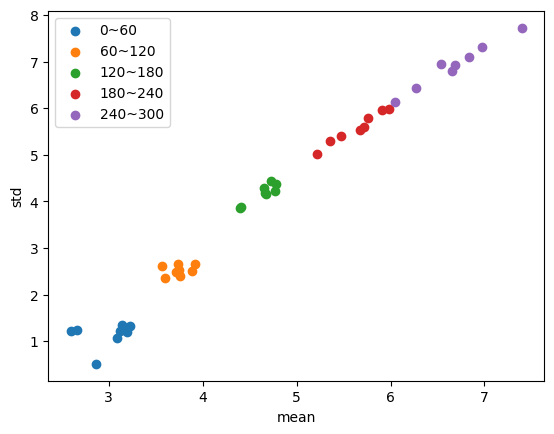

In [15]:
import matplotlib.pyplot as plt
import numpy as np

STEP = 60
origin = pd.DataFrame({'mean' : [],
                          'std' : []})
test = pd.DataFrame({'mean' : [],
                    'std' : []})

for cycle in range(0, 300, STEP):
    sub = df.query(f"Cycle >= {cycle} and Cycle < {cycle+1}")
    # [시간, strain, Cycle, 카운터]열은 생략.
    test['mean'] = (sub.mean()[4:])
    test['std'] = (sub.std()[4:])
    origin = origin.append(test, ignore_index=True)
    test['mean'] = np.log(test['mean'])
    test['std'] = np.log(test['std'])
    plt.scatter(test['mean'], test['std'], label=f"{cycle}~{cycle+STEP}")

print(origin)

plt.xlabel("mean")
plt.ylabel("std")
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13072\387764764.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\387764764.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\387764764.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\387764764.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\U

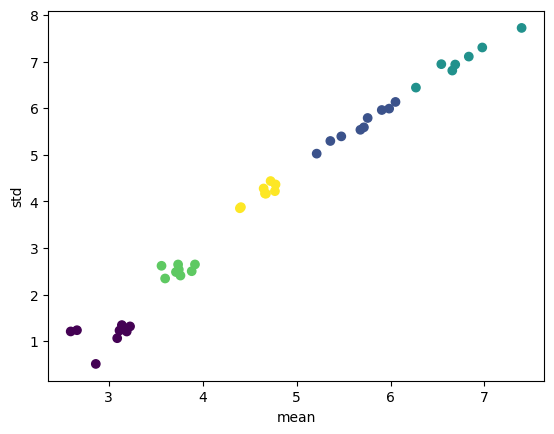

,mean,std,cluster
0,2.661796,1.237715,0
1,3.090055,1.066583,0
2,3.114757,1.231029,0
3,3.226900,1.319337,0
4,3.139774,1.347723,0
5,2.595107,1.211363,0
6,3.191534,1.209835,0
7,2.862325,0.514724,0
8,3.738410,2.647270,3
9,3.600363,2.346946,3


In [17]:
#sklearn 라이브러리를 이용한 K-means 클러스터링
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df = pd.read_csv(".\data\strain_09_sample_08.csv", encoding="cp949")

# 데이터 전처리
STEP = 60
origin = pd.DataFrame({'mean' : [], 'std' : []})
test = pd.DataFrame({'mean' : [], 'std' : []})

for cycle in range(0, 300, STEP):
    sub = df.query(f"Cycle >= {cycle} and Cycle < {cycle+1}")
    # [시간, strain, Cycle, 카운터]열은 생략.
    test['mean'] = (sub.mean()[4:])
    test['std'] = (sub.std()[4:])
    test['mean'] = np.log(test['mean'])
    test['std'] = np.log(test['std'])
    origin = origin.append(test, ignore_index=True)

# K-means 클러스터링
kmeans = KMeans(n_clusters=5, random_state=0).fit(origin)
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.scatter(origin['mean'], origin['std'], c=labels)
plt.xlabel("mean")
plt.ylabel("std")
plt.show()

# 클러스터링 결과 확인
origin['cluster'] = labels
origin

lr.coef_: [[1.54739921]]
lr.intercept_: [-3.25934246]
lr.score: 0.9828082987752588
mean_test: 3.999918491478158
std_test: 1.8447861237635754
prediction: [[2.93012824]]


C:\Users\user\AppData\Local\Temp\ipykernel_13072\3914199192.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\3914199192.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\3914199192.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13072\3914199192.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  origin = origin.append(test, ignore_index=True)


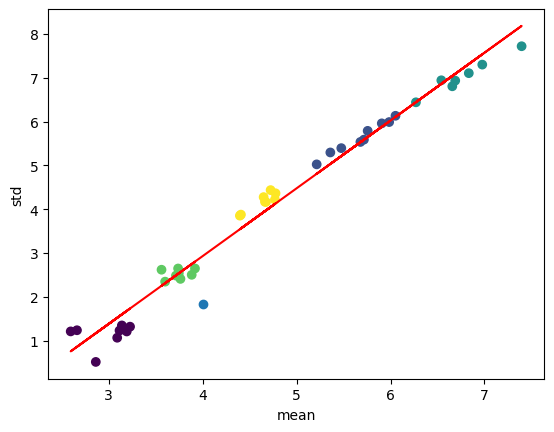

In [21]:
# sklearn 라이브러리를 이용한 linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df = pd.read_csv(".\data\strain_09_sample_08.csv", encoding="cp949")

# 데이터 전처리
STEP = 60
origin = pd.DataFrame({'mean' : [], 'std' : []})
test = pd.DataFrame({'mean' : [], 'std' : []})

for cycle in range(0, 300, STEP):
    sub = df.query(f"Cycle >= {cycle} and Cycle < {cycle+1}")
    # [시간, strain, Cycle, 카운터]열은 생략.
    test['mean'] = (sub.mean()[4:])
    test['std'] = (sub.std()[4:])
    test['mean'] = np.log(test['mean'])
    test['std'] = np.log(test['std'])
    origin = origin.append(test, ignore_index=True)

# linear regression
lr = LinearRegression().fit(origin[['mean']], origin[['std']])
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("lr.score:", lr.score(origin[['mean']], origin[['std']]))

# linear regression 결과 시각화
plt.scatter(origin['mean'], origin['std'], c=labels)
plt.plot(origin['mean'], lr.predict(origin[['mean']]), color='red')
plt.xlabel("mean")
plt.ylabel("std")

# prediction
#data = np.array([18.65185,18.68945,18.72674,18.8039,18.78956,19.0777,19.01463,18.11787,17.86334,17.26597])
data = np.array([60.7617,
62.47598,
59.90995,
58.4576,
57.41364,
50.88434,
51.14757,
46.69339,
43.59913
])

mean_test = np.log(data.mean())
std_test = np.log(data.std())
print("mean_test:", mean_test)
print("std_test:", std_test)
plt.scatter(mean_test, std_test)

print("prediction:", lr.predict([[mean_test]]))

plt.show()